In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from prettytable import PrettyTable


In [1]:
def f(x) -> float:
    return 2.74 * x**3 - 1.93 * x**2 - 15.28 * x - 3.72


def df(x):
    return 8.22 * x**2 - 3.86 * x - 15.28

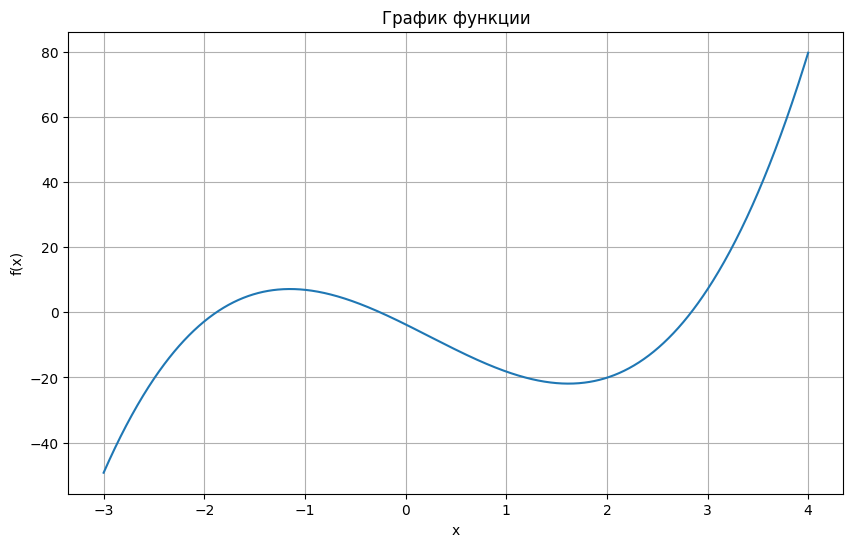

In [5]:
def draw_graphic():
    x = np.linspace(-3, 4, 1000)
    plt.figure(figsize=(10, 6))
    plt.plot(x, f(x))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функции')
    plt.show()
draw_graphic()

In [7]:
def pol_del(a, b, tol):
    """
    Метод половинного деления
    """
    if f(a) * f(b) >= 0:
        print('Корень не найден на данном интервале')
        return None
    table = PrettyTable()
    table.field_names = ["Итерация", "a", "b", "c", "f(c)"]
    
    c = a
    iterations = 0
    while abs(b - a) >= tol:
        c = (a + b) / 2
        table.add_row([iterations, f"{a:.6f}", f"{b:.6f}", f"{c:.6f}", f"{f(c):.6f}"])
        iterations += 1
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    print("Метод половинного деления:")
    print(table)
    return c, iterations

In [8]:
print(pol_del(-3, -1, 0.001))

Метод половинного деления:
+----------+-----------+-----------+-----------+-----------+
| Итерация |     a     |     b     |     c     |    f(c)   |
+----------+-----------+-----------+-----------+-----------+
|    0     | -3.000000 | -1.000000 | -2.000000 | -2.800000 |
|    1     | -2.000000 | -1.000000 | -1.500000 |  5.610000 |
|    2     | -2.000000 | -1.500000 | -1.750000 |  2.424687 |
|    3     | -2.000000 | -1.750000 | -1.875000 |  0.083320 |
|    4     | -2.000000 | -1.875000 | -1.937500 | -1.288589 |
|    5     | -1.937500 | -1.875000 | -1.906250 | -0.585447 |
|    6     | -1.906250 | -1.875000 | -1.890625 | -0.246798 |
|    7     | -1.890625 | -1.875000 | -1.882812 | -0.080677 |
|    8     | -1.882812 | -1.875000 | -1.878906 |  0.001587 |
|    9     | -1.882812 | -1.878906 | -1.880859 | -0.039478 |
|    10    | -1.880859 | -1.878906 | -1.879883 | -0.018929 |
+----------+-----------+-----------+-----------+-----------+
(-1.8798828125, 11)


In [9]:
print(pol_del(-1, 0, 0.001))

Метод половинного деления:
+----------+-----------+-----------+-----------+-----------+
| Итерация |     a     |     b     |     c     |    f(c)   |
+----------+-----------+-----------+-----------+-----------+
|    0     | -1.000000 |  0.000000 | -0.500000 |  3.095000 |
|    1     | -0.500000 |  0.000000 | -0.250000 | -0.063438 |
|    2     | -0.500000 | -0.250000 | -0.375000 |  1.594102 |
|    3     | -0.375000 | -0.250000 | -0.312500 |  0.782905 |
|    4     | -0.312500 | -0.250000 | -0.281250 |  0.363876 |
|    5     | -0.281250 | -0.250000 | -0.265625 |  0.151224 |
|    6     | -0.265625 | -0.250000 | -0.257812 |  0.044140 |
|    7     | -0.257812 | -0.250000 | -0.253906 | -0.009587 |
|    8     | -0.257812 | -0.253906 | -0.255859 |  0.017292 |
|    9     | -0.255859 | -0.253906 | -0.254883 |  0.003856 |
+----------+-----------+-----------+-----------+-----------+
(-0.2548828125, 10)


In [10]:
print(pol_del(0, 4, 0.001))

Метод половинного деления:
+----------+----------+----------+----------+------------+
| Итерация |    a     |    b     |    c     |    f(c)    |
+----------+----------+----------+----------+------------+
|    0     | 0.000000 | 4.000000 | 2.000000 | -20.080000 |
|    1     | 2.000000 | 4.000000 | 3.000000 |  7.050000  |
|    2     | 2.000000 | 3.000000 | 2.500000 | -11.170000 |
|    3     | 2.500000 | 3.000000 | 2.750000 | -3.352187  |
|    4     | 2.750000 | 3.000000 | 2.875000 |  1.509805  |
|    5     | 2.750000 | 2.875000 | 2.812500 | -1.003960  |
|    6     | 2.812500 | 2.875000 | 2.843750 |  0.231979  |
|    7     | 2.812500 | 2.843750 | 2.828125 | -0.391195  |
|    8     | 2.828125 | 2.843750 | 2.835938 | -0.080913  |
|    9     | 2.835938 | 2.843750 | 2.839844 |  0.075207  |
|    10    | 2.835938 | 2.839844 | 2.837891 | -0.002935  |
|    11    | 2.837891 | 2.839844 | 2.838867 |  0.036116  |
+----------+----------+----------+----------+------------+
(2.8388671875, 12)


In [11]:
def metod_hord(x0, x1, tol):
    """
    Метод хорд
    """
    f_x0 = f(x0)
    f_x1 = f(x1)
    x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
    
    table = PrettyTable()
    table.field_names = ["Итерация", "x0", "x1", "x2", "f(x2)"]
    table.add_row([0, f"{x0:.6f}", f"{x1:.6f}", f"{x2:.6f}", f"{f(x2):.6f}"])
    iterations =  1
    while abs(x2 - x1) >= tol:
        x0 = x1
        x1 = x2
        f_x0 = f_x1
        f_x1 = f(x1)
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        table.add_row([iterations, f"{x0:.6f}", f"{x1:.6f}", f"{x2:.6f}", f"{f(x2):.6f}"])
        iterations += 1

    print("Метод хорд:")
    print(table)
    return x2, iterations

In [12]:
print(metod_hord(-3, -1, 0.001))

Метод хорд:
+----------+-----------+-----------+-----------+-------------+
| Итерация |     x0    |     x1    |     x2    |    f(x2)    |
+----------+-----------+-----------+-----------+-------------+
|    0     | -3.000000 | -1.000000 | -1.245545 |   7.023212  |
|    1     | -1.000000 | -1.245545 | 11.700128 | 3941.861933 |
|    2     | -1.245545 | 11.700128 | -1.268652 |   6.963994  |
|    3     | 11.700128 | -1.268652 | -1.291604 |   6.892108  |
|    4     | -1.268652 | -1.291604 | -3.492155 |  -90.585820 |
|    5     | -1.291604 | -3.492155 | -1.447192 |   6.046170  |
|    6     | -3.492155 | -1.447192 | -1.575144 |   4.851649  |
|    7     | -1.447192 | -1.575144 | -2.094829 |  -5.368587  |
|    8     | -1.575144 | -2.094829 | -1.821843 |   1.143361  |
|    9     | -2.094829 | -1.821843 | -1.869774 |   0.191845  |
|    10    | -1.821843 | -1.869774 | -1.879438 |  -0.009570  |
|    11    | -1.869774 | -1.879438 | -1.878978 |   0.000073  |
+----------+-----------+-----------+-------

In [13]:
print(metod_hord(-1, 0, 0.001))

Метод хорд:
+----------+-----------+-----------+-----------+-----------+
| Итерация |     x0    |     x1    |     x2    |   f(x2)   |
+----------+-----------+-----------+-----------+-----------+
|    0     | -1.000000 |  0.000000 | -0.350613 |  1.282012 |
|    1     |  0.000000 | -0.350613 | -0.260751 |  0.084474 |
|    2     | -0.350613 | -0.260751 | -0.254412 | -0.002623 |
|    3     | -0.260751 | -0.254412 | -0.254603 |  0.000005 |
+----------+-----------+-----------+-----------+-----------+
(-0.2546029845543272, 4)


In [16]:
print(metod_hord(1, 4, 0.001))

Метод хорд:
+----------+----------+----------+----------+------------+
| Итерация |    x0    |    x1    |    x2    |   f(x2)    |
+----------+----------+----------+----------+------------+
|    0     | 1.000000 | 4.000000 | 1.557804 | -21.848567 |
|    1     | 4.000000 | 1.557804 | 2.083563 | -19.151481 |
|    2     | 1.557804 | 2.083563 | 5.816871 | 381.380312 |
|    3     | 2.083563 | 5.816871 | 2.262071 | -16.444848 |
|    4     | 5.816871 | 2.262071 | 2.409016 | -13.424004 |
|    5     | 2.262071 | 2.409016 | 3.062006 | 10.059748  |
|    6     | 2.409016 | 3.062006 | 2.782284 | -2.159647  |
|    7     | 3.062006 | 2.782284 | 2.831722 | -0.248668  |
|    8     | 2.782284 | 2.831722 | 2.838155 |  0.007630  |
|    9     | 2.831722 | 2.838155 | 2.837963 | -0.000026  |
+----------+----------+----------+----------+------------+
(2.8379634106268896, 10)


In [18]:
def newton_method(x0, tol = 0.001):
    table = PrettyTable()
    table.field_names = ["Итерация", "x", "f(x)", "f'(x)", "x - f(x)/f'(x)"]

    x = x0
    iterations = 0
    while abs(f(x)) > tol:
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            print("Производная равна нулю, метод Ньютона не применим")
            return None, None
        x_next = x - fx / dfx
        table.add_row([iterations, f"{x:.6f}", f"{fx:.6f}", f"{dfx:.6f}", f"{x_next:.6f}"])
        x = x_next
        iterations += 1

    print("Метод Ньютона")
    print(table)
    return x, iterations


In [19]:
print(newton_method(-3, 0.001))

Метод Ньютона
+----------+-----------+------------+-----------+----------------+
| Итерация |     x     |    f(x)    |   f'(x)   | x - f(x)/f'(x) |
+----------+-----------+------------+-----------+----------------+
|    0     | -3.000000 | -49.230000 | 70.280000 |   -2.299516    |
|    1     | -2.299516 | -12.105345 | 37.061642 |   -1.972889    |
|    2     | -1.972889 | -2.126994  | 24.329979 |   -1.885466    |
|    3     | -1.885466 | -0.136863  | 21.219855 |   -1.879016    |
+----------+-----------+------------+-----------+----------------+
(-1.8790163462391276, 4)


In [22]:
print(newton_method(-1, 0.001))

Метод Ньютона
+----------+-----------+------------+-----------+----------------+
| Итерация |     x     |    f(x)    |   f'(x)   | x - f(x)/f'(x) |
+----------+-----------+------------+-----------+----------------+
|    0     | -1.000000 |  6.890000  | -3.200000 |    1.153125    |
|    1     |  1.153125 | -19.704804 | -8.800951 |   -1.085815    |
|    2     | -1.085815 |  7.088130  | -1.397414 |    3.986502    |
|    3     |  3.986502 | 78.285079  | 99.965999 |    3.203385    |
|    4     |  3.203385 | 17.596813  | 56.705926 |    2.893068    |
|    5     |  2.893068 |  2.267936  | 42.352880 |    2.839520    |
|    6     |  2.839520 |  0.062236  | 40.036269 |    2.837965    |
+----------+-----------+------------+-----------+----------------+
(2.837965344271222, 7)


In [23]:
print(newton_method(0, 0.001))

Метод Ньютона
+----------+-----------+-----------+------------+----------------+
| Итерация |     x     |    f(x)   |   f'(x)    | x - f(x)/f'(x) |
+----------+-----------+-----------+------------+----------------+
|    0     |  0.000000 | -3.720000 | -15.280000 |   -0.243455    |
|    1     | -0.243455 | -0.153930 | -13.853058 |   -0.254567    |
+----------+-----------+-----------+------------+----------------+
(-0.2545671041157671, 2)


In [24]:
def fixed_point(x0, tol=0.001):
    table = PrettyTable()
    table.field_names = ["Итерация", "x", "f(x)", "x - f(x)/f'(x)"]

    x = x0
    iterations = 0
    while abs(f(x)) >= tol:
        x_next = x - f(x) / df(x)
        table.add_row([iterations, f"{x:.6f}", f"{f(x):.6f}", f"{abs(x - x_next):.6f}"])
        x = x_next
        iterations += 1

    print("Метод последовательных приближений:")
    print(table)
    return x, iterations

In [25]:
print(fixed_point(-3, 0.001))

Метод последовательных приближений:
+----------+-----------+------------+----------------+
| Итерация |     x     |    f(x)    | x - f(x)/f'(x) |
+----------+-----------+------------+----------------+
|    0     | -3.000000 | -49.230000 |    0.700484    |
|    1     | -2.299516 | -12.105345 |    0.326627    |
|    2     | -1.972889 | -2.126994  |    0.087423    |
|    3     | -1.885466 | -0.136863  |    0.006450    |
+----------+-----------+------------+----------------+
(-1.8790163462391276, 4)


In [26]:
print(fixed_point(-1, 0.001))

Метод последовательных приближений:
+----------+-----------+------------+----------------+
| Итерация |     x     |    f(x)    | x - f(x)/f'(x) |
+----------+-----------+------------+----------------+
|    0     | -1.000000 |  6.890000  |    2.153125    |
|    1     |  1.153125 | -19.704804 |    2.238940    |
|    2     | -1.085815 |  7.088130  |    5.072318    |
|    3     |  3.986502 | 78.285079  |    0.783117    |
|    4     |  3.203385 | 17.596813  |    0.310317    |
|    5     |  2.893068 |  2.267936  |    0.053549    |
|    6     |  2.839520 |  0.062236  |    0.001554    |
+----------+-----------+------------+----------------+
(2.837965344271222, 7)


In [27]:
print(fixed_point(0, 0.001))

Метод последовательных приближений:
+----------+-----------+-----------+----------------+
| Итерация |     x     |    f(x)   | x - f(x)/f'(x) |
+----------+-----------+-----------+----------------+
|    0     |  0.000000 | -3.720000 |    0.243455    |
|    1     | -0.243455 | -0.153930 |    0.011112    |
+----------+-----------+-----------+----------------+
(-0.2545671041157671, 2)


In [28]:
# Проверка решений
x = sp.symbols('x')
function = 2.74 * x**3 - 1.93 * x**2 - 15.28 * x - 3.72

solutions = sp.solve(function, x)
print(solutions)

[-1.87898184796133 - 0.e-23*I, -0.25460264009267 + 0.e-22*I, 2.8379640500978 - 0.e-21*I]
